# <font color='blue'>Melanoma Detection Assignment - Convolutional Network</font>

# <font color='blue'>Index</font>
- <font color='blue'>1. Initial Steps</font>
	- <font color='blue'>1.1 Imports</font>
	- <font color='blue'>1.2 Google Drive Connect</font>
	- <font color='blue'>1.3 Setting paths</font>
	- <font color='blue'>1.4 Listing File Counts</font>
	- <font color='blue'>1.5 Params Declaration</font>
	- <font color='blue'>1.6 Creating Dataset</font>
	- <font color='blue'>1.7 Listing Class Names</font>
	- <font color='blue'>1.8 Visualizing Data</font>
	- <font color='blue'>1.9 Setting cache for Dataset</font>
- <font color='blue'>2. Models</font>
	- <font color='blue'>2.1 Model 1 - Basic Model with Convolutional Layers Only</font>
		- <font color='blue'>2.1.1 Model Design, Compile & Summary</font>
		- <font color='blue'>2.1.2 Model Training</font>
		- <font color='blue'>2.1.3 Visualizing Training Results</font>
	- <font color='blue'>2.2 Augmenting Training Dataset</font>
	- <font color='blue'>2.3 Model 2 - Convolutional Layers + Augmentation</font>
		- <font color='blue'>2.3.1 Model Design, Compile & Summary</font>
		- <font color='blue'>2.3.2 Model Training</font>
		- <font color='blue'>2.3.3 Visualizing Training Results</font>
	- <font color='blue'>2.4 Model 3 - Convolutional Layers + Augmentation + Dropout</font>
		- <font color='blue'>2.4.1 Model Design, Compile & Summary</font>
		- <font color='blue'>2.4.2 Model Training</font>
		- <font color='blue'>2.4.3 Visualizing Training Results</font>
	- <font color='blue'>2.5 Model 4 - Convolutional Layers + Augmentation + Additional Dropouts</font>
		- <font color='blue'>2.5.1 Model Design, Compile & Summary</font>
		- <font color='blue'>2.5.2 Model Training</font>
		- <font color='blue'>2.5.3 Visualizing Training Results</font>
	- <font color='blue'>2.6 Model 5 - Convolutional Layers + Augmentation + Additional Dropouts + Batch Normalization</font>
		- <font color='blue'>2.6.1 Model Design, Compile & Summary</font>
		- <font color='blue'>2.6.2 Model Training</font>
		- <font color='blue'>2.6.3 Visualizing Training Results</font>
	- <font color='blue'>2.7 Class Imbalance Augmentation</font>
		- <font color='blue'>2.7.1 Class Distribution</font>
		- <font color='blue'>2.7.2 Rectification with Augmentor Samples Generation</font>
	- <font color='blue'>2.8 Model 6 - Convolutional Layers + Additional Dropouts + Batch Normalization + Augmented Dataset</font>
		- <font color='blue'>2.8.1 Reinitializing Dataset with New Augmented Data</font>
		- <font color='blue'>2.8.2 Model Design, Compile & Summary</font>
		- <font color='blue'>2.8.3 Model Training</font>
		- <font color='blue'>2.8.4 Visualizing Training Results</font>
- <font color='blue'>3. Model Prediction</font>
	- <font color='blue'>3.1 Initializing Test Dataset</font>
	- <font color='blue'>3.2 Evaluate, Record Accuracy & Loss</font>
	- <font color='blue'>3.3 Predicting Probability on 1st Image of each Class</font>

## <font color='blue'>1. Initial Steps</font>

Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### <font color='blue'>1.1 Imports</font>

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers, models, metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import LearningRateScheduler, ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2


from glob import glob

import warnings
warnings.filterwarnings('ignore')

2024-11-20 19:40:36.568250: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1732111836.660971   72448 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1732111836.688443   72448 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-20 19:40:36.908532: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
!python --version
print('Numpy:', np.version.version)
print('Pands:', pd.__version__)
print('Tensorflow:', tf.__version__)
!jupyter --version

Python 3.11.10
Numpy: 2.0.2
Pands: 2.2.3
Tensorflow: 2.18.0
Selected Jupyter core packages...
IPython          : 8.29.0
ipykernel        : 6.29.5
ipywidgets       : not installed
jupyter_client   : 8.6.3
jupyter_core     : 5.7.2
jupyter_server   : not installed
jupyterlab       : not installed
nbclient         : not installed
nbconvert        : not installed
nbformat         : not installed
notebook         : not installed
qtconsole        : not installed
traitlets        : 5.14.3


### <font color='blue'>1.2 Google Drive Connect</font>

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
ls /content/gdrive/MyDrive/MelanomaDetection/CNN_

ls: cannot access '/content/gdrive/MyDrive/MelanomaDetection/CNN_': No such file or directory


### <font color='blue'>1.3 Setting paths</font>

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [3]:
# Defining the path for train and test images
# Google Drive
data_dir_train = pathlib.Path("resources/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path("resources/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test")

### <font color='blue'>1.4 Listing File Counts</font>

In [4]:
image_count_train = len(list(data_dir_train.glob('**/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('**/*.jpg')))
print(image_count_test)

3744
118


### <font color='blue'>1.5 Params Declaration</font>

In [5]:
batch_size = 32
img_height = 180
img_width = 180
seed = 123

### <font color='blue'>1.6 Creating Dataset</font>

In [6]:
# Using 80% of the images for training, and 20% for validation.
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    validation_split=0.2,  # 80% for training, 20% for validation
    subset="training",
    seed=seed,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 3744 files belonging to 9 classes.
Using 2996 files for training.


I0000 00:00:1732111867.969512   72448 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2784 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1650, pci bus id: 0000:01:00.0, compute capability: 7.5


In [7]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    validation_split=0.2,
    subset="validation",
    seed=seed,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 3744 files belonging to 9 classes.
Using 748 files for validation.


### <font color='blue'>1.7 Listing Class Names</font>

In [8]:
# List out all the classes of skin cancer and store them in a list.
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
num_classes = len(class_names)
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### <font color='blue'>1.8 Visualizing Data</font>

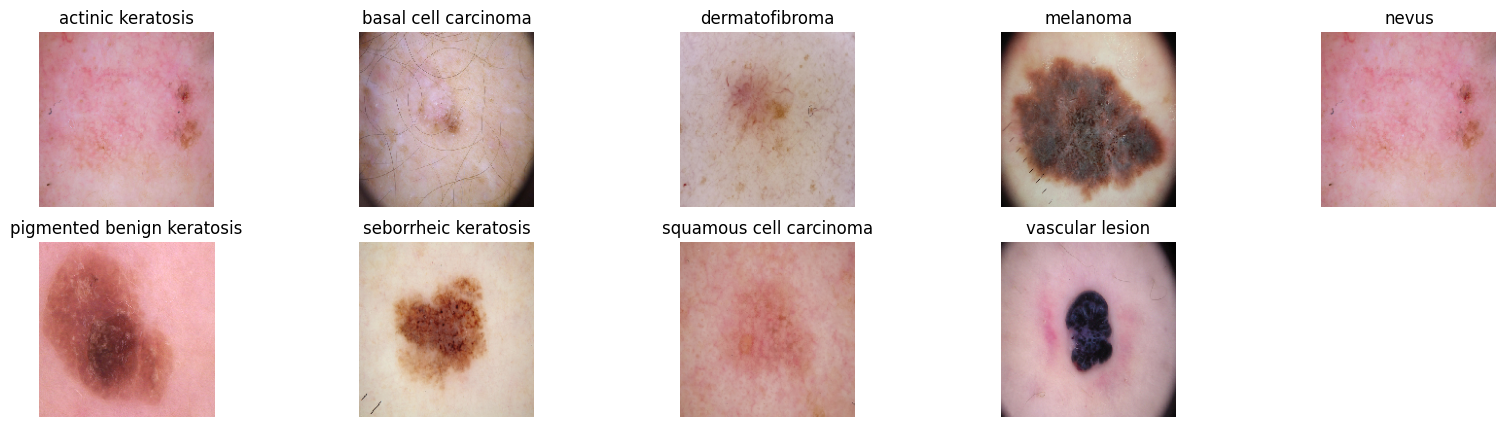

In [11]:
plt.figure(figsize=(20, 5))

# iterate over each class and display one image
for i, class_name in enumerate(class_names):
    class_path = os.path.join(data_dir_train, class_name)
    image_path = os.path.join(class_path, os.listdir(class_path)[0])  # Get the first image in each class
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(img_height, img_width))

    plt.subplot(2, 5, i + 1)  # Adjust the subplot layout based on the number of classes
    plt.imshow(img)
    plt.title(class_name)
    plt.axis("off")

plt.show()

### <font color='blue'>1.9 Setting cache for Dataset</font>

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [12]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

## <font color='blue'>2. Models</font>

### <font color='blue'>2.1 Model 1 - Basic Model with Convolutional Layers Only</font>

#### <font color='blue'>2.1.1 Model Design, Compile & Summary</font>

In [ ]:
model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

    # Convolutional layers
    layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2), strides=2),

    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2), strides=2),

    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2), strides=2),

    # Flatten and Dense layers
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Use 'categorical_crossentropy' if using one-hot encoding for labels
              metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 180, 180, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 90, 90, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 90, 90, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 45, 45, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 45, 45, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 22, 22, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 61952)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      31,719,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 9)                   │           4,617 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,817,801 (121.38 MB)

 Trainable params: 31,817,801 (121.38 MB)

 Non-trainable params: 0 (0.00 B)

#### <font color='blue'>2.1.2 Model Training</font>

In [ ]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 380s 1s/step - accuracy: 0.1956 - loss: 2.7083 - val_accuracy: 0.3020 - val_loss: 1.8902
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - accuracy: 0.3602 - loss: 1.7691 - val_accuracy: 0.4452 - val_loss: 1.6742
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.5039 - loss: 1.4447 - val_accuracy: 0.5347 - val_loss: 1.3914
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.5010 - loss: 1.3824 - val_accuracy: 0.5213 - val_loss: 1.4259
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.5507 - loss: 1.2669 - val_accuracy: 0.4922 - val_loss: 1.4226
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.5853 - loss: 1.1633 - val_accuracy: 0.5101 - val_loss: 1.3693
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.6004 - loss: 1.0952 - val_accuracy: 0.5235 - val_loss: 1.5252
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.6471 - loss: 1.0294 - val_accuracy: 0.5213 - v

#### <font color='blue'>2.1.3 Visualizing Training Results</font>

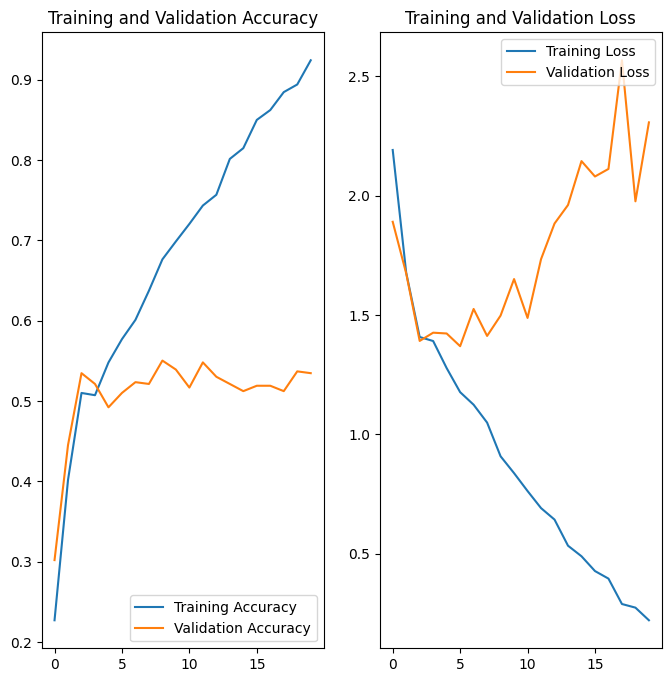

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### <font color='blue'>Findings:</font>
1. Training Accuracy: is High
2. Validation Accuracy: is OK
3. Training Loss: is decreasing, good fit
4. Validation Loss: is increasing, not a good fit

### <font color='blue'>2.2 Augmenting Training Dataset</font>

In [13]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy.
# Your code goes here
augmented_train_ds = keras.Sequential([
                             layers.RandomFlip(mode="horizontal_and_vertical",input_shape=(img_height,img_width,3)),
                             layers.RandomRotation(0.2, fill_mode='reflect'),
                             layers.RandomZoom(height_factor=(0.2, 0.3), width_factor=(0.2, 0.3), fill_mode='reflect')
])

### <font color='blue'>2.3 Model 2 - Convolutional Layers + Augmentation</font>

#### <font color='blue'>2.3.1 Model Design, Compile & Summary</font>

In [ ]:
model = models.Sequential([
    augmented_train_ds,
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

    # Convolutional layers
    layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2), strides=2),

    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2), strides=2),

    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2), strides=2),

    # Flatten and Dense layers
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Use 'categorical_crossentropy' if using one-hot encoding for labels
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)            │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_1 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 180, 180, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 90, 90, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 90, 90, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 45, 45, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 45, 45, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 22, 22, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 61952)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │      31,719,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 9)                   │           4,617 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,817,801 (121.38 MB)

 Trainable params: 31,817,801 (121.38 MB)

 Non-trainable params: 0 (0.00 B)

#### <font color='blue'>2.3.2 Model Training</font>

In [ ]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 8s 63ms/step - accuracy: 0.2167 - loss: 2.5970 - val_accuracy: 0.3758 - val_loss: 1.8192
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - accuracy: 0.3566 - loss: 1.7732 - val_accuracy: 0.4116 - val_loss: 1.5976
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - accuracy: 0.4440 - loss: 1.5523 - val_accuracy: 0.4452 - val_loss: 1.5127
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - accuracy: 0.4883 - loss: 1.4652 - val_accuracy: 0.4877 - val_loss: 1.4455
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - accuracy: 0.5137 - loss: 1.3937 - val_accuracy: 0.4810 - val_loss: 1.4098
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - accuracy: 0.5192 - loss: 1.3282 - val_accuracy: 0.4989 - val_loss: 1.4568
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.5404 - loss: 1.3064 - val_accuracy: 0.5347 - val_loss: 1.3799
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - accuracy: 0.5266 - loss: 1.2896 - val_accuracy: 0.5190 - v

#### <font color='blue'>2.3.3 Visualizing Training Results</font>

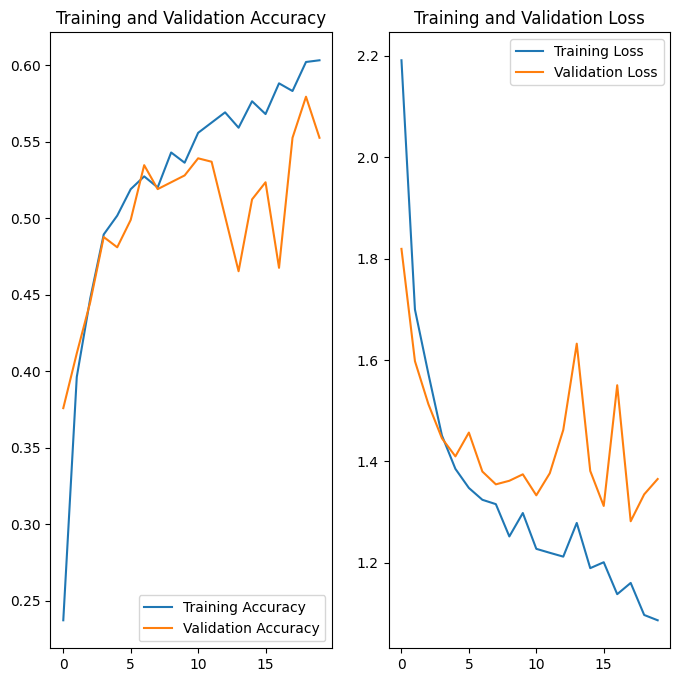

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### <font color='blue'>Findings:</font>
1. Training Accuracy: is OK
2. Validation Accuracy: is Low
3. Training Loss: is decreasing, good fit
4. Validation Loss: is increasing, not a good fit

### <font color='blue'>2.4 Model 3 - Convolutional Layers + Augmentation + Dropout</font>

#### <font color='blue'>2.4.1 Model Design, Compile & Summary</font>

In [ ]:
model = models.Sequential([
    augmented_train_ds,
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

    # Convolutional layers
    layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2), strides=2),

    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2), strides=2),

    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2), strides=2),
    layers.Dropout(0.2),

    # Flatten and Dense layers
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Use 'categorical_crossentropy' if using one-hot encoding for labels
              metrics=['accuracy'])

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)            │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_2 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 180, 180, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 90, 90, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 90, 90, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 45, 45, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 45, 45, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 22, 22, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 22, 22, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 61952)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │      31,719,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 9)                   │           4,617 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,817,801 (121.38 MB)

 Trainable params: 31,817,801 (121.38 MB)

 Non-trainable params: 0 (0.00 B)

#### <font color='blue'>2.4.2 Model Training</font>

In [ ]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 81ms/step - accuracy: 0.1830 - loss: 2.9739 - val_accuracy: 0.2103 - val_loss: 2.1372
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - accuracy: 0.3007 - loss: 1.8947 - val_accuracy: 0.4631 - val_loss: 1.5909
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - accuracy: 0.4511 - loss: 1.5177 - val_accuracy: 0.5011 - val_loss: 1.5110
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 77ms/step - accuracy: 0.4960 - loss: 1.4568 - val_accuracy: 0.5235 - val_loss: 1.3960
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - accuracy: 0.5427 - loss: 1.3275 - val_accuracy: 0.5123 - val_loss: 1.3669
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - accuracy: 0.5402 - loss: 1.3060 - val_accuracy: 0.5302 - val_loss: 1.3495
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - accuracy: 0.5370 - loss: 1.2813 - val_accuracy: 0.5056 - val_loss: 1.4999
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - accuracy: 0.5274 - loss: 1.2915 - val_accuracy: 0.5056 - v

#### <font color='blue'>2.4.3 Visualizing Training Results</font>

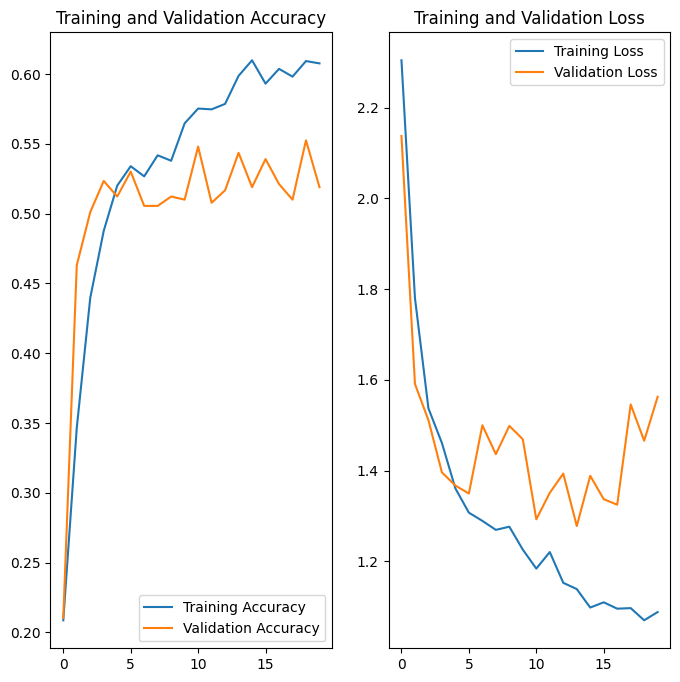

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### <font color='blue'>Findings:</font>
1. Training Accuracy: is OK
2. Validation Accuracy: is Low
3. Training Loss: is decreasing, good fit
4. Validation Loss: is decreasing, good start

### <font color='blue'>2.5 Model 4 - Convolutional Layers + Augmentation + Additional Dropouts</font>

#### <font color='blue'>2.5.1 Model Design, Compile & Summary</font>

In [ ]:
model = models.Sequential([
    augmented_train_ds,
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

    # Convolutional layers
    layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2), strides=2),
    # layers.Dropout(0.2),

    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2), strides=2),
    layers.Dropout(0.2),

    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2), strides=2),
    layers.Dropout(0.2),

    # Flatten and Dense layers
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)            │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_6 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 180, 180, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 90, 90, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 90, 90, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 45, 45, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 45, 45, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 45, 45, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 22, 22, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 22, 22, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 61952)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 512)                 │      31,719,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 9)                   │           4,617 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,817,801 (121.38 MB)

 Trainable params: 31,817,801 (121.38 MB)

 Non-trainable params: 0 (0.00 B)

#### <font color='blue'>2.5.2 Model Training</font>

In [ ]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 14s 75ms/step - accuracy: 0.1802 - loss: 2.4971 - val_accuracy: 0.2910 - val_loss: 1.8080
Epoch 2/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 20s 73ms/step - accuracy: 0.3666 - loss: 1.6576 - val_accuracy: 0.4269 - val_loss: 1.5595
Epoch 3/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 20s 73ms/step - accuracy: 0.4186 - loss: 1.5217 - val_accuracy: 0.4417 - val_loss: 1.4587
Epoch 4/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 12s 74ms/step - accuracy: 0.4299 - loss: 1.4575 - val_accuracy: 0.4692 - val_loss: 1.3574
Epoch 5/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 12s 73ms/step - accuracy: 0.4729 - loss: 1.3818 - val_accuracy: 0.4759 - val_loss: 1.3241
Epoch 6/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 20s 73ms/step - accuracy: 0.4925 - loss: 1.3166 - val_accuracy: 0.4484 - val_loss: 1.3298
Epoch 7/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 12s 73ms/step - accuracy: 0.4926 - loss: 1.3098 - val_accuracy: 0.4878 - val_loss: 1.3940
Epoch 8/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 21s 74ms/step - accuracy: 0.5160 - loss: 1.2650 - 

#### <font color='blue'>2.5.3 Visualizing Training Results</font>

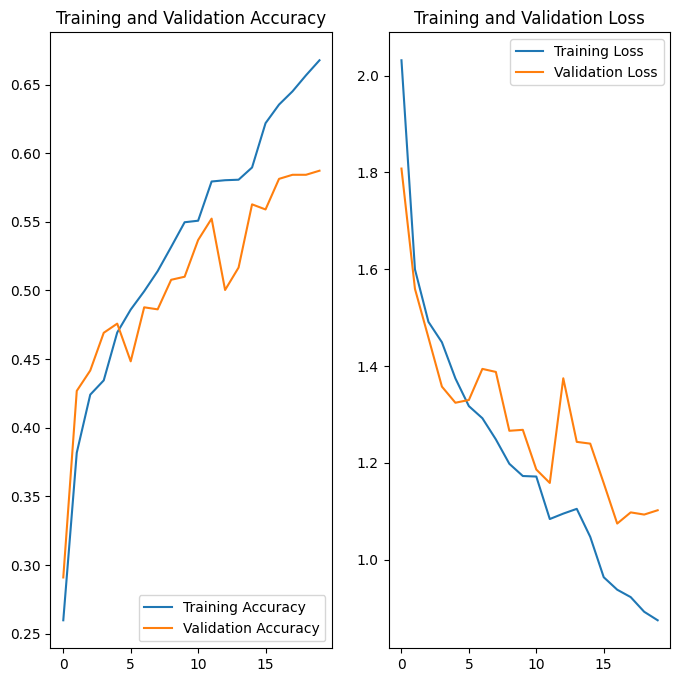

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### <font color='blue'>Findings:</font>
1. Training Accuracy: is OK
2. Validation Accuracy: is Low
3. Training Loss: is decreasing, good fit
4. Validation Loss: is decreasing, good progress

### <font color='blue'>2.6 Model 5 - Convolutional Layers + Augmentation + Additional Dropouts + Batch Normalization</font>

#### <font color='blue'>2.6.1 Model Design, Compile & Summary</font>

In [ ]:
model = models.Sequential([
    augmented_train_ds,
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

    # Convolutional layers
    layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2), strides=2),
    layers.BatchNormalization(),
    layers.Dropout(0.2),

    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2), strides=2),
    layers.BatchNormalization(),
    layers.Dropout(0.2),

    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2), strides=2),
    layers.BatchNormalization(),
    layers.Dropout(0.2),

    # Flatten and Dense layers
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Use 'categorical_crossentropy' if using one-hot encoding for labels
              metrics=['accuracy'])

model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)            │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_4 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 180, 180, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 90, 90, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 90, 90, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 90, 90, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 90, 90, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 45, 45, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 45, 45, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 45, 45, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 45, 45, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 22, 22, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 22, 22, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 22, 22, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 61952)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 512)                 │      31,719,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 9)                   │           4,617 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,818,697 (121.38 MB)

 Trainable params: 31,818,249 (121.38 MB)

 Non-trainable params: 448 (1.75 KB)

#### <font color='blue'>2.6.2 Model Training</font>

In [ ]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 9s 96ms/step - accuracy: 0.3109 - loss: 13.9758 - val_accuracy: 0.1499 - val_loss: 17.3349
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 9s 91ms/step - accuracy: 0.3637 - loss: 1.7541 - val_accuracy: 0.1499 - val_loss: 28.7491
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - accuracy: 0.3779 - loss: 1.7024 - val_accuracy: 0.1499 - val_loss: 33.4618
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - accuracy: 0.4573 - loss: 1.5671 - val_accuracy: 0.1611 - val_loss: 33.9203
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - accuracy: 0.4676 - loss: 1.5480 - val_accuracy: 0.1477 - val_loss: 30.4976
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - accuracy: 0.4966 - loss: 1.5123 - val_accuracy: 0.1477 - val_loss: 28.3447
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - accuracy: 0.4865 - loss: 1.4974 - val_accuracy: 0.1767 - val_loss: 13.8659
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - accuracy: 0.4748 - loss: 1.5303 - val_accuracy: 0.

#### <font color='blue'>2.6.3 Visualizing Training Results</font>

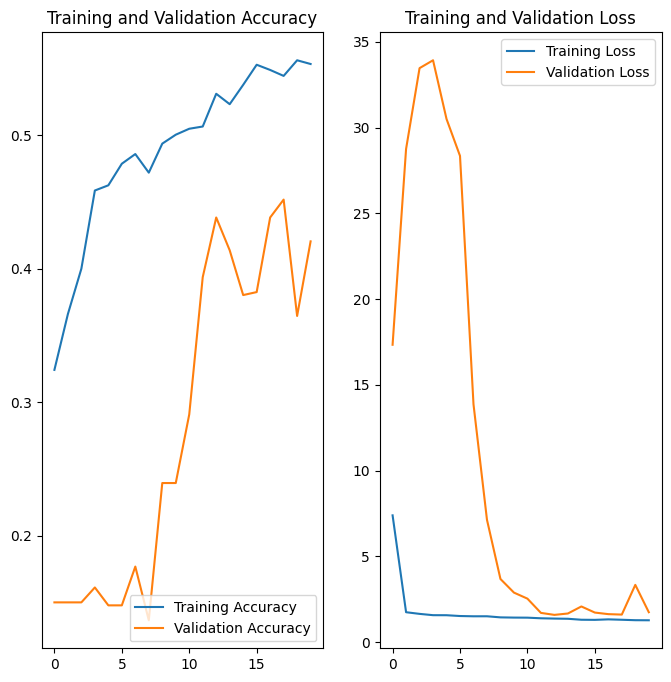

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### <font color='blue'>Findings:</font>
1. Training Accuracy: is Low
2. Validation Accuracy: is Low
3. Training Loss: is decreasing, good fit
4. Validation Loss: is decreasing

### <font color='blue'>2.7 Class Imbalance Augmentation</font>

#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

#### <font color='blue'>2.7.1 Class Distribution</font>

In [9]:
# train data in each folders
dir_train = os.listdir(data_dir_train)
dir_train.sort()
dir_test = os.listdir(data_dir_test)
dir_test.sort()

data_detail_pd = pd.DataFrame(columns=["Class","Images (Train)","Percentage (Train)","Images (Test)","Percentage (Test)"])

for dir_name in dir_train:
   total_image_in_folder = len(list(data_dir_train.glob(dir_name+"/*.jpg")))
   df = {"Class":dir_name,"Images (Train)":total_image_in_folder,"Percentage (Train)":round((total_image_in_folder/image_count_train)*100,2)}
   data_detail_pd = pd.concat([data_detail_pd, pd.DataFrame(df, index=[0])],ignore_index=True)

data_detail_pd = data_detail_pd.set_index("Class")

# test data in each folders
for dir_name in dir_test:
   total_image_in_folder = len(list(data_dir_test.glob(dir_name+"/*.jpg")))
   data_detail_pd.loc[dir_name,"Images (Test)"]  = total_image_in_folder
   data_detail_pd.loc[dir_name,"Percentage (Test)"]  = round((total_image_in_folder/image_count_test)*100,2)

display(data_detail_pd.sort_values(by="Percentage (Train)",ascending=False))

,Images (Train),Percentage (Train),Images (Test),Percentage (Test)
Class,,,,
pigmented benign keratosis,462,6.86,16,13.56
melanoma,438,6.50,16,13.56
basal cell carcinoma,376,5.58,16,13.56
nevus,357,5.30,16,13.56
squamous cell carcinoma,181,2.69,16,13.56
vascular lesion,139,2.06,3,2.54
actinic keratosis,114,1.69,16,13.56
dermatofibroma,95,1.41,16,13.56
seborrheic keratosis,77,1.14,3,2.54


### Findings:
1. Highest Training Images: pigmented benign keratosis, 462 = 20.63%
2. Lowest Training Images: seborrheic keratosis, 77 = 3.44%
3. Highest Testing Images: All have same except vascular lesion, seborrheic keratosis, 16 = 0.71%
4. Lowest Testing Images: vascular lesion, seborrheic keratosis, 3 = 0.13%

#### <font color='blue'>2.7.2 Rectification with Augmentor Samples Generation</font>

In [14]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


### Generating samples with Augmentor

In [9]:
import Augmentor

path_to_training_dataset = str(data_dir_train) + '/'
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to resources/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x70A5E114E510>: 100%|██████████| 500/500 [00:04<00:00, 122.56 Samples/s]                  


Initialised with 376 image(s) found.
Output directory set to resources/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x70A5742EF750>: 100%|██████████| 500/500 [00:04<00:00, 121.55 Samples/s]                  


Initialised with 95 image(s) found.
Output directory set to resources/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x70A5E1171090>: 100%|██████████| 500/500 [00:03<00:00, 132.65 Samples/s]


Initialised with 438 image(s) found.
Output directory set to resources/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x70A5E0980DD0>: 100%|██████████| 500/500 [00:17<00:00, 29.14 Samples/s]                   


Initialised with 357 image(s) found.
Output directory set to resources/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x70A5E0971A90>: 100%|██████████| 500/500 [00:17<00:00, 28.70 Samples/s] 


Initialised with 462 image(s) found.
Output directory set to resources/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x70A5E0994190>: 100%|██████████| 500/500 [00:04<00:00, 116.81 Samples/s]                  


Initialised with 77 image(s) found.
Output directory set to resources/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x70A5E1127C10>: 100%|██████████| 500/500 [00:08<00:00, 56.89 Samples/s]


Initialised with 181 image(s) found.
Output directory set to resources/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x70A5E092F9D0>: 100%|██████████| 500/500 [00:04<00:00, 114.76 Samples/s]


Initialised with 139 image(s) found.
Output directory set to resources/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x70A5E113B690>: 100%|██████████| 500/500 [00:04<00:00, 115.41 Samples/s]                  


In [10]:
import os

for i in class_names:
    directory =str(data_dir_train)
    directory_out =str(data_dir_train)+'/'+i+'/output/'
    class_directory = pathlib.Path(directory)
    class_directory_out = pathlib.Path(directory_out)
    length=len(list(class_directory.glob(i+'/*.jpg')))
    length_out=len(list(class_directory_out.glob('*.jpg')))
    length_tot=length+length_out
    print(f"Class {i}: {length_tot} images")


Class actinic keratosis: 614 images
Class basal cell carcinoma: 876 images
Class dermatofibroma: 595 images
Class melanoma: 938 images
Class nevus: 857 images
Class pigmented benign keratosis: 962 images
Class seborrheic keratosis: 577 images
Class squamous cell carcinoma: 681 images
Class vascular lesion: 639 images


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [11]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### <font color='blue'>2.8 Model 6 - Convolutional Layers + Additional Dropouts + Batch Normalization + Augmented Dataset</font>

#### <font color='blue'>2.8.1 Reinitializing Dataset with New Augmented Data</font>

In [12]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    validation_split=0.2,  # 80% for training, 20% for validation
    subset="training",
    seed=seed,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [13]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    validation_split=0.2,
    subset="validation",
    seed=seed,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [14]:
# Apply caching, shuffling, and prefetching
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

#### <font color='blue'>2.8.2 Model Design, Compile & Summary</font>

In [14]:
# # Learning Rate Scheduler Function
# def scheduler(epoch, lr):
#     if epoch < 10:
#         return lr
#     else:
#         return lr * tf.math.exp(-0.1)  # Exponential decay after 10 epochs

# Learning Rate Scheduler Function
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        # Convert the tensor to a NumPy float before returning
        return lr * float(tf.math.exp(-0.1))  # Exponential decay after 10 epochs

model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

    # Convolutional layers with increased depth and L2 regularization
    layers.Conv2D(32, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.01)),
    layers.MaxPooling2D((2, 2), strides=2),
    layers.BatchNormalization(),
    # layers.Dropout(0.3),  # Increased dropout rate to 30%

    layers.Conv2D(64, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.01)),
    layers.MaxPooling2D((2, 2), strides=2),
    layers.BatchNormalization(),
    layers.Dropout(0.2),

    layers.Conv2D(128, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.01)),
    layers.MaxPooling2D((2, 2), strides=2),
    layers.BatchNormalization(),
    # layers.Dropout(0.3),

    # Global Average Pooling instead of Flatten
    layers.GlobalAveragePooling2D(),

    # Fully connected layers
    layers.Dense(512, activation='relu', kernel_regularizer=l2(0.01)),
    layers.Dropout(0.3),  # Higher dropout rate for dense layer
    layers.Dense(num_classes, activation='softmax')
])

# Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Change to categorical_crossentropy if using one-hot encoding
              metrics=['accuracy'])

# Callbacks for learning rate scheduler
lr_scheduler = LearningRateScheduler(scheduler)

# Print model summary
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 180, 180, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 90, 90, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 90, 90, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 90, 90, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 45, 45, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 45, 45, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 45, 45, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 45, 45, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 22, 22, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 22, 22, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 9)              │         4,617 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 164,809 (643.79 KB)

 Trainable params: 164,361 (642.04 KB)

 Non-trainable params: 448 (1.75 KB)

#### <font color='blue'>2.8.3 Model Training</font>

In [23]:
epochs = 20
# history = model.fit(
#   train_ds,
#   validation_data=val_ds,
#   epochs=epochs
# )
history = model.fit(
    train_ds,  # Augmented training dataset
    epochs=epochs,  # You can adjust the number of epochs as needed
    validation_data=val_ds,  # Validation dataset
    callbacks=[lr_scheduler],  # Learning rate scheduler
    verbose=2  # Print progress during training
)

Epoch 1/20


2024-11-20 14:31:43.351085: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:37: Filling up shuffle buffer (this may take a while): 47 of 1000
2024-11-20 14:32:03.318459: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:37: Filling up shuffle buffer (this may take a while): 132 of 1000
2024-11-20 14:32:11.083570: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.
I0000 00:00:1732093331.090137   40508 service.cc:148] XLA service 0x7eec94011c20 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1732093331.090204   40508 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5
2024-11-20 14:32:11.198581: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1732093331.542697   40508 cuda_dnn.cc:529] Loaded cuDNN

169/169 - 70s - 413ms/step - accuracy: 0.3144 - loss: 3.6095 - val_accuracy: 0.1403 - val_loss: 3.0777 - learning_rate: 1.0000e-03
Epoch 2/20
169/169 - 10s - 59ms/step - accuracy: 0.3563 - loss: 2.1835 - val_accuracy: 0.1151 - val_loss: 2.6206 - learning_rate: 1.0000e-03
Epoch 3/20
169/169 - 11s - 67ms/step - accuracy: 0.3676 - loss: 1.8643 - val_accuracy: 0.0913 - val_loss: 2.7345 - learning_rate: 1.0000e-03
Epoch 4/20
169/169 - 11s - 67ms/step - accuracy: 0.3800 - loss: 1.7754 - val_accuracy: 0.1336 - val_loss: 9.5850 - learning_rate: 1.0000e-03
Epoch 5/20
169/169 - 11s - 67ms/step - accuracy: 0.3909 - loss: 1.7275 - val_accuracy: 0.1930 - val_loss: 3.3867 - learning_rate: 1.0000e-03
Epoch 6/20
169/169 - 11s - 67ms/step - accuracy: 0.3960 - loss: 1.7059 - val_accuracy: 0.2650 - val_loss: 2.1979 - learning_rate: 1.0000e-03
Epoch 7/20
169/169 - 11s - 67ms/step - accuracy: 0.3960 - loss: 1.6868 - val_accuracy: 0.1388 - val_loss: 10.4957 - learning_rate: 1.0000e-03
Epoch 8/20
169/169 - 1

#### <font color='blue'>2.8.4 Visualizing Training Results</font>

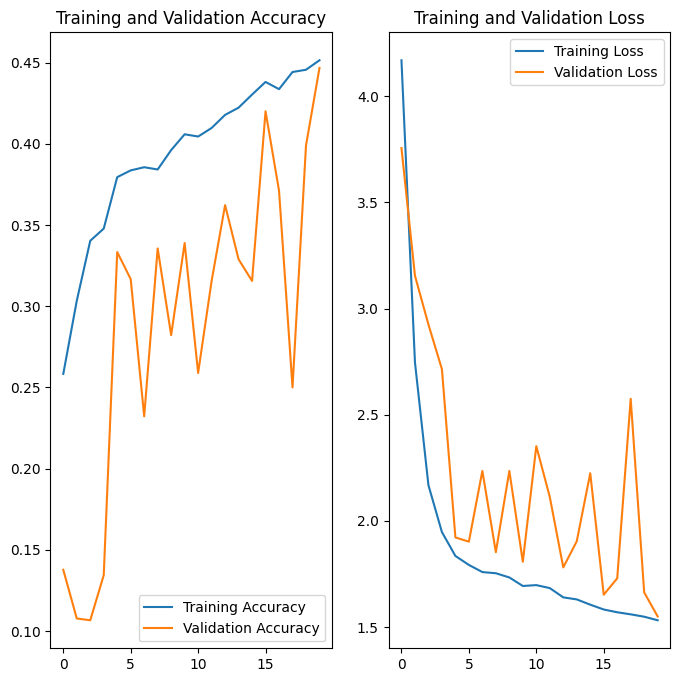

In [37]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### <font color='blue'>Findings:</font>
1. Training Accuracy: is Good
2. Validation Accuracy: is OK
3. Training Loss: is decreasing, good fit
4. Validation Loss: is decreasing but it unable to do prediction which shows overfit

### <font color='blue'>2.9 Model 7 - Convolutional Layers + Additional Dropouts + Batch Normalization + Augmented Dataset + Learning Scheduler + Early Stopping</font>

In [15]:
model = Sequential([
layers.Rescaling(1./255,input_shape=(img_width,img_height,3)),
layers.Conv2D(32,kernel_size=(3,3),activation='relu'),
layers.MaxPool2D(pool_size=(2,2)),
layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
layers.MaxPool2D(pool_size=(2,2)),
layers.Conv2D(128,kernel_size=(3,3),activation='relu'),
layers.MaxPool2D(pool_size=(2,2)),
layers.Conv2D(256,kernel_size=(11,11),activation='relu'),
layers.MaxPool2D(pool_size=(2,2)),
layers.Dropout(0.5),
layers.Flatten(),
layers.Dense(256,activation='relu'),
layers.Dropout(0.25),
layers.Dense(128,activation='relu'),
layers.Dropout(0.25),
layers.Dense(64,activation='relu'),
layers.Dropout(0.25),
layers.Dense(len(class_names),activation='softmax'),
])


### Todo, choose an appropirate optimiser and loss function
learn_control = ReduceLROnPlateau(monitor='val_accuracy', patience=5,
                                  verbose=1,factor=0.2, min_lr=1e-7)
opt=tf.keras.optimizers.Adam()
model.compile(optimizer=opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [16]:
epochs = 50
history = model.fit(
train_ds,
validation_data=val_ds,
epochs=epochs,
callbacks=[learn_control]
)


Epoch 1/50


I0000 00:00:1732112347.809735   72816 service.cc:148] XLA service 0x70a4a00116a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1732112347.809909   72816 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5
2024-11-20 19:49:07.874554: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1732112348.232082   72816 cuda_dnn.cc:529] Loaded cuDNN version 90300
2024-11-20 19:49:09.168271: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[32,32,178,178]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,3,180,180]{3,2,1,0}, f32[32,3,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"act

119/169 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - accuracy: 0.1455 - loss: 2.1651

2024-11-20 19:49:25.439889: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[16,32,178,178]{3,2,1,0}, u8[0]{0}) custom-call(f32[16,3,180,180]{3,2,1,0}, f32[32,3,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kNone","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}
2024-11-20 19:49:25.528719: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[16,64,87,87]{3,2,1,0}, u8[0]{0}) custom-call(f32[16,32,89,89]{3,2,1,0}, f32[64,32,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_con

169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.1568 - loss: 2.1357

2024-11-20 19:49:34.945724: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[32,32,178,178]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,3,180,180]{3,2,1,0}, f32[32,3,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kRelu","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}
2024-11-20 19:49:35.048745: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[32,64,87,87]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,32,89,89]{3,2,1,0}, f32[64,32,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_con

169/169 ━━━━━━━━━━━━━━━━━━━━ 42s 127ms/step - accuracy: 0.1570 - loss: 2.1352 - val_accuracy: 0.3022 - val_loss: 1.9360 - learning_rate: 0.0010
Epoch 2/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 11s 68ms/step - accuracy: 0.2873 - loss: 1.8272 - val_accuracy: 0.4061 - val_loss: 1.5293 - learning_rate: 0.0010
Epoch 3/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 14s 81ms/step - accuracy: 0.3694 - loss: 1.6483 - val_accuracy: 0.4269 - val_loss: 1.4250 - learning_rate: 0.0010
Epoch 4/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 14s 81ms/step - accuracy: 0.3845 - loss: 1.5488 - val_accuracy: 0.3749 - val_loss: 1.6133 - learning_rate: 0.0010
Epoch 5/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 14s 81ms/step - accuracy: 0.3959 - loss: 1.5559 - val_accuracy: 0.4217 - val_loss: 1.4889 - learning_rate: 0.0010
Epoch 6/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 14s 81ms/step - accuracy: 0.4244 - loss: 1.4595 - val_accuracy: 0.4684 - val_loss: 1.3198 - learning_rate: 0.0010
Epoch 7/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 14s 82ms/step - accuracy: 0.4335 - loss: 1.414

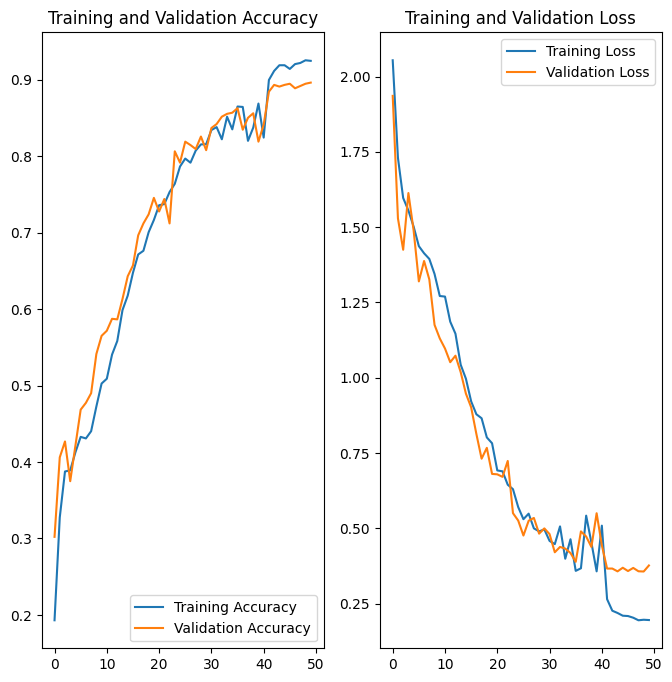

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### <font color='blue'>Findings:</font>
1. The training accuracy and validation accuracy are close. 
2. The training loss and validation loss are  close.
3. The training accuracy is 92% whereas Validation accuracy is 89% which is close and seems good fit.

## <font color='blue'>3. Model Prediction</font>

### <font color='blue'>3.1 Initializing Test Dataset</font>

In [18]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_test,
    seed = seed,
    image_size = (img_height,img_width),
    batch_size = batch_size
)

Found 118 files belonging to 9 classes.


### <font color='blue'>3.2 Evaluate, Record Accuracy & Loss</font>

In [19]:
loss , accuracy = model.evaluate(test_ds)
print("Accuracy: ", accuracy)
print("Loss: ", loss)

3/4 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - accuracy: 0.3837 - loss: 4.9270

2024-11-20 20:01:46.655027: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[22,32,178,178]{3,2,1,0}, u8[0]{0}) custom-call(f32[22,3,180,180]{3,2,1,0}, f32[32,3,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kRelu","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}
2024-11-20 20:01:46.799518: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[22,64,87,87]{3,2,1,0}, u8[0]{0}) custom-call(f32[22,32,89,89]{3,2,1,0}, f32[64,32,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_con

4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.3861 - loss: 5.1981  
Accuracy:  0.38983049988746643
Loss:  5.604907035827637


### <font color='blue'>3.3 Predicting Probability on 1st Image of each Class</font>

In [20]:
for i, class_name in enumerate(class_names):
    class_path = os.path.join(data_dir_test, class_name)
    file_name = os.listdir(class_path)[0]
    image_path = os.path.join(class_path, file_name)  # Get the first image in each class

    img = tf.keras.utils.load_img(
      image_path, target_size=(img_height, img_width)
    )
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) # Create a batch
    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])

    print('Test/{}/{}=> Score:{}'.format(class_name,file_name,score))
    #print("This image most likely belongs to {} with a {:.2f} percent confidence.".format(test_ds.class_names[np.argmax(score)], 100 * np.max(score)))

2024-11-20 20:02:57.313585: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[1,64,87,87]{3,2,1,0}, u8[0]{0}) custom-call(f32[1,32,89,89]{3,2,1,0}, f32[64,32,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kRelu","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}
2024-11-20 20:02:57.418194: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[1,128,41,41]{3,2,1,0}, u8[0]{0}) custom-call(f32[1,64,43,43]{3,2,1,0}, f32[128,64,3,3]{3,2,1,0}, f32[128]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 975ms/step
Test/actinic keratosis/ISIC_0010889.jpg=> Score:[0.09339134 0.09339129 0.09339131 0.09393953 0.25228572 0.09342685
 0.0933914  0.09339134 0.09339129]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Test/basal cell carcinoma/ISIC_0024360.jpg=> Score:[0.0980758  0.23462845 0.09543654 0.09460457 0.09497087 0.09545223
 0.09457593 0.09767371 0.09458184]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Test/dermatofibroma/ISIC_0024553.jpg=> Score:[0.09337469 0.2525238  0.09385093 0.09337467 0.09337467 0.09337471
 0.09337467 0.09337705 0.09337475]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Test/melanoma/ISIC_0000046.jpg=> Score:[0.09331515 0.09331515 0.09331515 0.09331521 0.25337487 0.09341895
 0.09331515 0.09331515 0.09331515]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Test/nevus/ISIC_0000010.jpg=> Score:[0.09333201 0.09333201 0.09333201 0.09333234 0.25313437 0.09354123
 0.09333201 0.09333201 0.09333201]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Test/pigmented benign keratosis/ISIC_00244